In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', category=UserWarning)

from Processing.load_dataset import Load_dataset
from Processing.processing import Split, Valid, Submission
from Engineering.var_delete import engin
from Valid.validation import rmse

from Model.lightgbm import LightGBM
from Model.xgboost import XGBOOST
from Model.nn import NN
from sklearn.metrics import mean_squared_error

In [ ]:
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

## Light-GBM

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13769
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 54
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.7891	Test's rmse: 20.7318


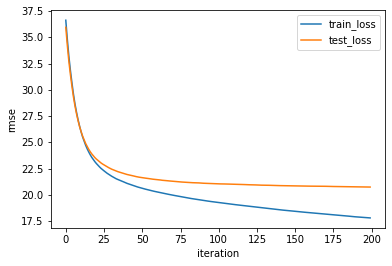

<BarContainer object of 20 artists>

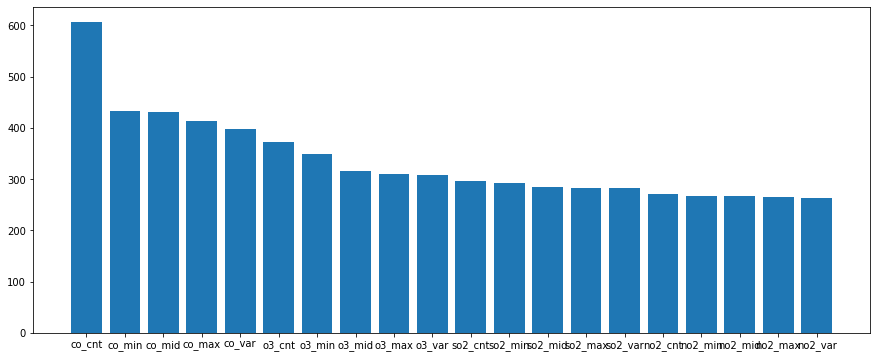

In [11]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [12]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.731787558634657
RMSE:  20.693335253501807


In [13]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_var')

## xgboost

In [15]:
xgboost = XGBOOST(X_train, X_valid, y_train, y_valid, fig=1)

<BarContainer object of 45 artists>

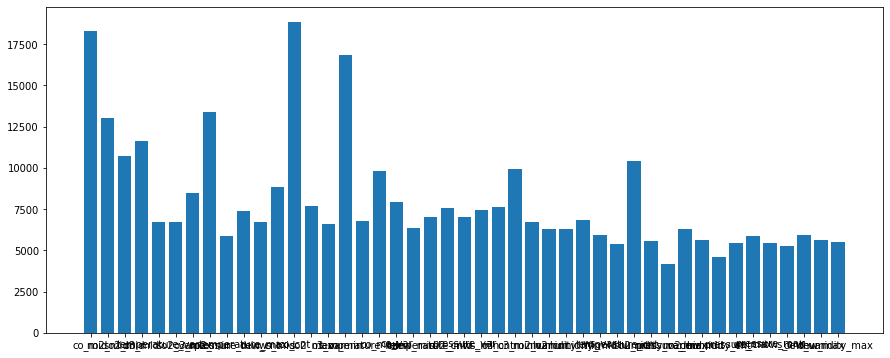

In [26]:
importance = list(xgboost.get_score(importance_type='weight').values())
col = list(xgboost.get_score(importance_type='weight').keys())
plt.figure(figsize=(15,6))
plt.bar(col, importance)

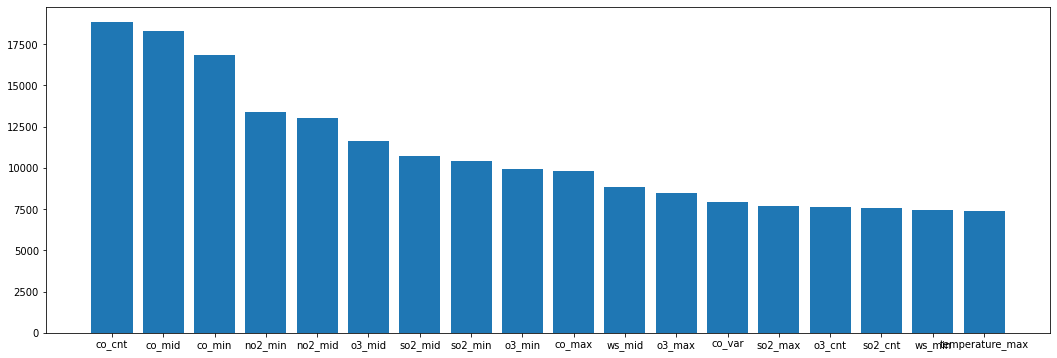

In [57]:
# 最大
im = pd.DataFrame([col,importance], index=["columns", "importance"]).T
im = im.sort_values('importance', ascending=False)
plt.figure(figsize=(18,6))
plt.bar(im["columns"][:18], im["importance"][:18])
plt.show()

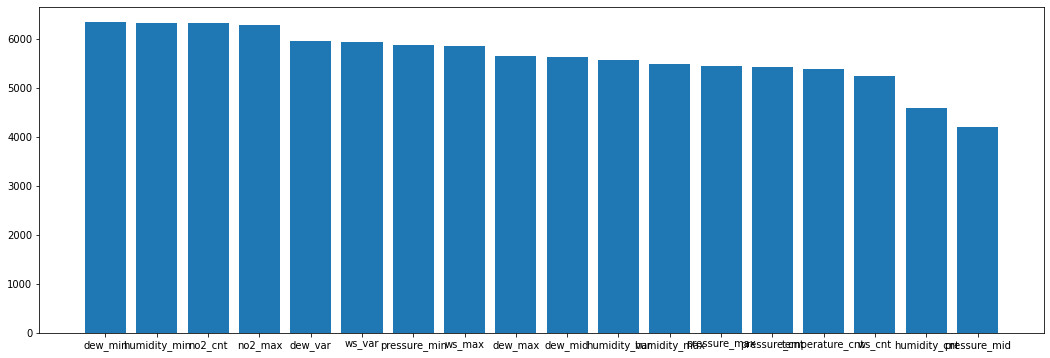

In [58]:
# 最小
im = pd.DataFrame([col,importance], index=["columns", "importance"]).T
im = im.sort_values('importance', ascending=False)
plt.figure(figsize=(18,6))
plt.bar(im["columns"][-18:], im["importance"][-18:])
plt.show()

In [18]:
# 評価
import xgboost as xgb
dm_valid = xgb.DMatrix(X_valid)
valid_predict = xgboost.predict(dm_valid)
rmse(valid_predict, y_valid)

dm_test = xgb.DMatrix(X_test)
test_predict = xgboost.predict(dm_test)
rmse(test_predict, y_test)

RMSE:  20.47883383403503
RMSE:  20.395146661257535


In [19]:
# 予測
test = xgb.DMatrix(test_df)
predict_xgboost = xgboost.predict(test, ntree_limit=xgboost.best_ntree_limit)

Submission(index, predict_xgboost, name='xgb_std')

## var delete

In [64]:
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11474
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 45
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.7953	Test's rmse: 20.7276


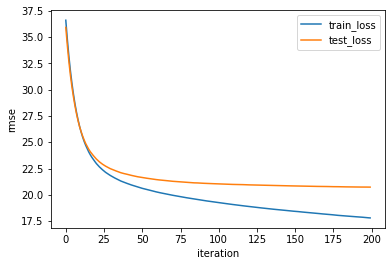

<BarContainer object of 20 artists>

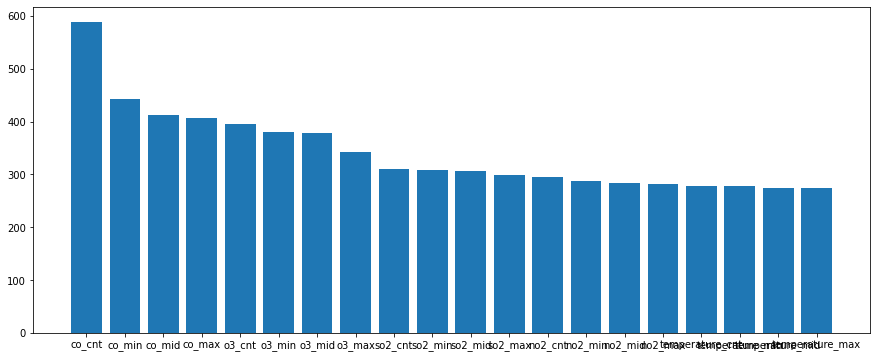

In [67]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [68]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.727551215458096
RMSE:  20.60984175300553


In [69]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_var_delete')

In [70]:
xgboost = XGBOOST(X_train, X_valid, y_train, y_valid, fig=1)

In [71]:
# 評価
import xgboost as xgb
dm_valid = xgb.DMatrix(X_valid)
valid_predict = xgboost.predict(dm_valid)
rmse(valid_predict, y_valid)

dm_test = xgb.DMatrix(X_test)
test_predict = xgboost.predict(dm_test)
rmse(test_predict, y_test)

RMSE:  20.47678497236048
RMSE:  20.395613568179286


In [72]:
# 予測
test = xgb.DMatrix(test_df)
predict_xgboost = xgboost.predict(test, ntree_limit=xgboost.best_ntree_limit)

Submission(index, predict_xgboost, name='xgb_var_delete')

In [4]:
from Engineering.var_delete import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11498
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 57
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.6602	Test's rmse: 20.5382


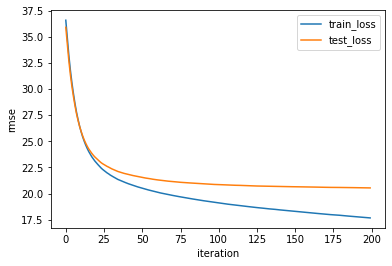

<BarContainer object of 20 artists>

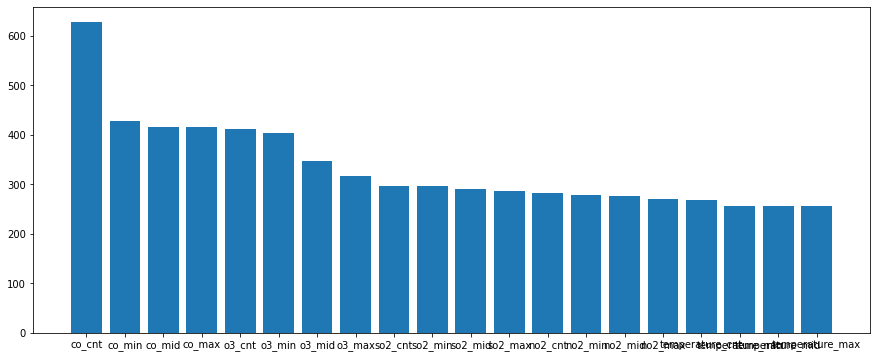

In [7]:
Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

In [8]:
# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

RMSE:  20.53818529755004
RMSE:  20.469423456251338


In [9]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_dummy_month')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11564
[LightGBM] [Info] Number of data points in the train set: 125401, number of used features: 90
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 59.230542
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[200]	Train's rmse: 17.3763	Test's rmse: 20.0876


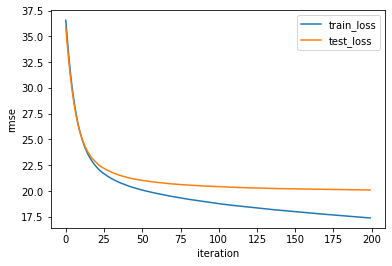

RMSE:  20.087579512658778
RMSE:  19.986129997191256


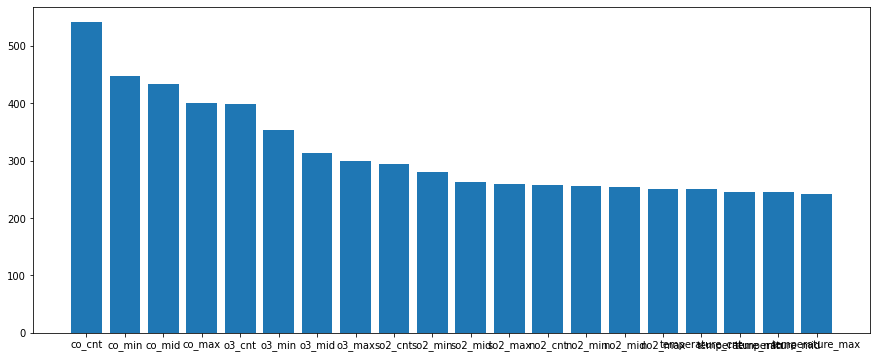

In [10]:
from Engineering.dummy import engin
train, test = Load_dataset()

# 提出用
index = np.array(test["id"])

# 加工・処理
train_df = engin(train)
test_df = engin(test)

# val, train, test
X_train, X_test, y_train, y_test, index = Split(train_df)
X_train, X_valid, y_train, y_valid = Valid(X_train, y_train)

Light_GBM = LightGBM(X_train, X_valid, y_train, y_valid, fig=1)
importance = pd.DataFrame(sorted(Light_GBM.feature_importance(), reverse=True), index=X_test.columns, columns=['importance'])
plt.figure(figsize=(15,6))
plt.bar(X_test.columns[:20], np.ravel(importance.values)[:20])

# 評価
valid_predict = Light_GBM.predict(X_valid)
rmse(valid_predict, y_valid)

test_predict = Light_GBM.predict(X_test)
rmse(test_predict, y_test)

In [11]:
# 予測
index = test_df["id"]
test_df = test_df.drop(["id"], axis=1)
predict_light_gbm = Light_GBM.predict(data=test_df)

# 提出
Submission(index, predict_light_gbm, name='light_dummy')

In [12]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [13]:
select = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=123),
                        threshold="median")

In [ ]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)

C:\Users\yu886\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
print(X_train.shape)
print(X_train_l1.shape)

In [ ]:
X_valid_l1 = select.transform(X_valid)
Light_GBM = LightGBM(X_train_l1, X_valid_l1, y_train, y_valid, fig=1)

valid_predict = Light_GBM.predict(X_valid_l1)
rmse(valid_predict, y_valid)

X_test_l1 = select.transform(X_test)
test_predict = Light_GBM.predict(X_test_l1)
rmse(test_predict, y_test)